In [1]:
import os
import numpy as np
import mne
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from copy import deepcopy
from mne.preprocessing import create_ecg_epochs, create_eog_epochs, read_ica
import sys
from langouEEG import *
from tensorpac import Pac, EventRelatedPac, PreferredPhase
from tensorpac.utils import PeakLockedTF, PSD, ITC, BinAmplitude

S03
Reading 0 ... 1197699  =      0.000 ...  2395.398 secs...
1 duplicate electrode labels found:
M1/Trigger
Plotting 66 unique labels.
Creating RawArray with float64 data, n_channels=66, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


C:\MatlabWorkspace\langouEEG.py:118: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mne.viz.plot_montage(layout)


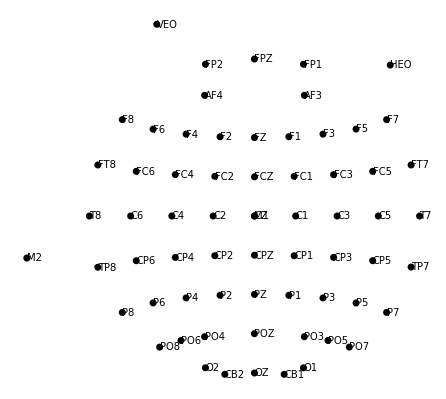

file info:
<Info | 10 non-empty values
 bads: 1 items (Trigger)
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 66 items (66 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2021-11-06 03:16:32 UTC
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
 subject_info: 5 items (dict)
>
channel names:
['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'VEO', 'Trigger']
time period:
1197700
events:
Used Annotations descriptions: ['11', '12', '8', '9']
{'random_flicker-60s': 1, 'random_rest-300s': 2, '40Hz_rest-300s': 3, '40Hz_flicker-60s': 4}
Filtering raw data in 1 co

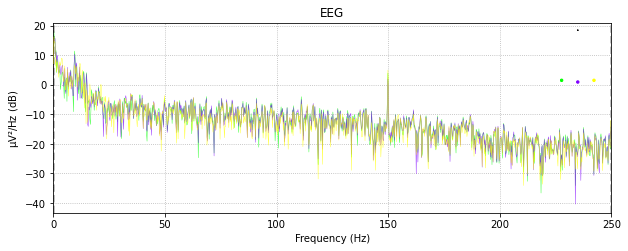

Fitting ICA to data using 65 channels (please be patient, this may take a while)


C:\MatlabWorkspace\langouEEG.py:158: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components=20, random_state=0)


Selecting by number: 20 components
Fitting ICA took 50.4s.
    Searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    14, 8, 11
Ready.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 65 PCA components
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 13501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 30001 ori

In [2]:
subject_name='S03'
print(subject_name)
raw,picks,picks_str = initData(subject_name)
initLayout(raw)
events, event_dict=extractEvents(raw)
filterRaw(raw, picks, ref_set_average=False, ref_channels=['M1', 'M2'])
runICA(raw)
epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs(raw,events,picks)
epochs = epoch_RR,epoch_RF,epoch_4R,epoch_4F

In [3]:
epoch_4F_raw=epoch_4F.to_data_frame()
epoch_4F_np=epoch_4F_raw.values[:,3:6].flatten()

In [6]:
for i in range(64):
    epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs(raw,events,i)
    epoch_4F_raw=epoch_4F.to_data_frame()
    epoch_4F_np=epoch_4F_raw.values[:,3:6].flatten()
    epochs_4F=[]
    epochs=[]
    epochs_4F.append(epoch_4F_np)
    epochs.append([epoch_RR,epoch_RF,epoch_4R,epoch_4F])

Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 13501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 13501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection ite

In [ ]:
sf = 500
p_obj = Pac(idpac=(6, 0, 0), f_pha=np.arange(4,8,0.1), f_amp=np.arange(30,50))
pha_p = p_obj.filter(sf, epoch_4F_np, ftype='phase')
amp_p = p_obj.filter(sf, epoch_4F_np, ftype='amplitude')
time_exec = slice(5000, 6000)
pha_exec, amp_exec = pha_p[..., time_exec], amp_p[..., time_exec]
pac_exec = p_obj.fit(pha_exec, amp_exec).mean(-1)

In [ ]:
for i in range(64):
    for j in range

In [ ]:
vmax = pac_exec.max()
kw = dict(vmax=vmax, vmin=.04, cmap='viridis')
plt.figure(figsize=(14, 4))
p_obj.comodulogram(pac_exec, title="PAC Execution [1.5, 3]s", **kw)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
epoch_4F_np.shape